In [1]:
import ROOT
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import numpy as np
import pdb

In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


/cvmfs/sphenix.sdcc.bnl.gov/alma9.2-gcc-14.2.0/opt/sphenix/core/lib/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/Run2024


In [41]:
gens = ['reweight_epos','reweight_ampt','reweight_hijing']
data_vz = []
mc_vz = []
ratio = []
data_vz_full = []
mc_vz_full = []

for i, gen in enumerate(gens):
    f = ROOT.TFile.Open(f"dETdeta_vertex_reweight_run54912_{gen}_2024_ana450_2024p009_fixed_build.root")
    ratio.append(ROOT.TH1F(f.Get("vz_ratio_zoom")))
    ratio[i].SetDirectory(0)
    data_vz.append(ROOT.TH1F(f.Get("h_vz_data_zoom")))
    data_vz[i].SetDirectory(0)
    mc_vz.append(ROOT.TH1F(f.Get("h_vz_mc_zoom")))
    mc_vz[i].SetDirectory(0)
    data_vz_full.append(ROOT.TH1F(f.Get("h_vz_data")))
    data_vz_full[i].SetDirectory(0)
    mc_vz_full.append(ROOT.TH1F(f.Get("h_vz_mc")))
    mc_vz_full[i].SetDirectory(0)
    f.Close()

In [42]:
rgb = [[230, 25, 75], [60, 180, 75], [255, 225, 25], [0, 130, 200], [245, 130, 48], [145, 30, 180], [70, 240, 240], [240, 50, 230], [210, 245, 60], [250, 190, 212], [0, 128, 128], [220, 190, 255], [170, 110, 40], [255, 250, 200], [128, 0, 0], [170, 255, 195], [128, 128, 0], [255, 215, 180], [0, 0, 128], [128, 128, 128], [34, 139, 34], [0, 0, 0]]
colors = [TColor.GetColor(rgb[i][0],rgb[i][1],rgb[i][2]) for i in range(len(rgb))]

In [47]:
for i in range(len(data_vz_full)):
    print(data_vz_full[i].GetMean(),data_vz_full[i].GetRMS())
for i in range(len(mc_vz_full)):
    print(mc_vz_full[i].GetMean(),mc_vz_full[i].GetRMS())

1.5718840732457922 11.597138498896848
1.5718840732457922 11.597138498896848
1.5718840732457922 11.597138498896848
0.10708942525811001 7.323267676214405
0.04622644977678927 5.061221588504424
0.05391038687687053 5.064684613280153


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/vz_ratio_all_runs_run24.png has been created


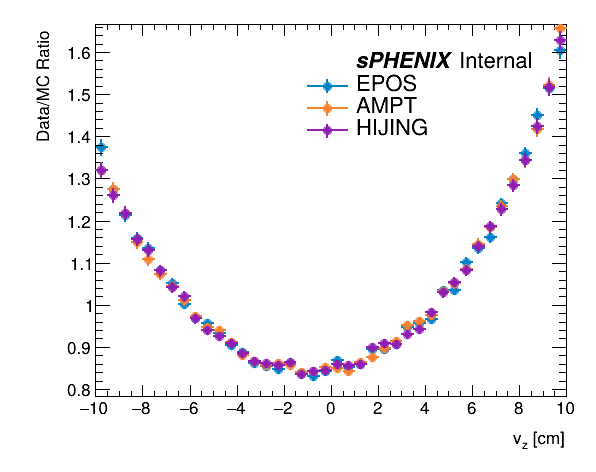

In [43]:
GENS = ['EPOS',"AMPT","HIJING"]
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.5,.7,.89,.89)
leg.SetBorderSize(0)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
for i in range(len(ratio)):
    leg.AddEntry(ratio[i],f"{GENS[i]}","lep")
    ratio[i].GetXaxis().SetRangeUser(-10,10)
    ratio[i].SetStats(0)
    ratio[i].SetLineColor(colors[i+3])
    ratio[i].SetMarkerColor(colors[i+3])
    ratio[i].SetMarkerStyle(20)
    if i == 0:
        ratio[i].SetXTitle("v_{z} [cm]")
        ratio[i].SetYTitle("Data/MC Ratio")
        ratio[i].GetYaxis().SetTitleSize(0.04)
        ratio[i].GetXaxis().SetTitleSize(0.04)
        ratio[i].GetYaxis().SetLabelSize(0.04)
        ratio[i].GetXaxis().SetLabelSize(0.04)
        ratio[i].Draw()
    else:
        ratio[i].Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/spring_2025/detdeta_run24_plots/vz_ratio_all_runs_run24.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/vz_all_runs_run24.png has been created


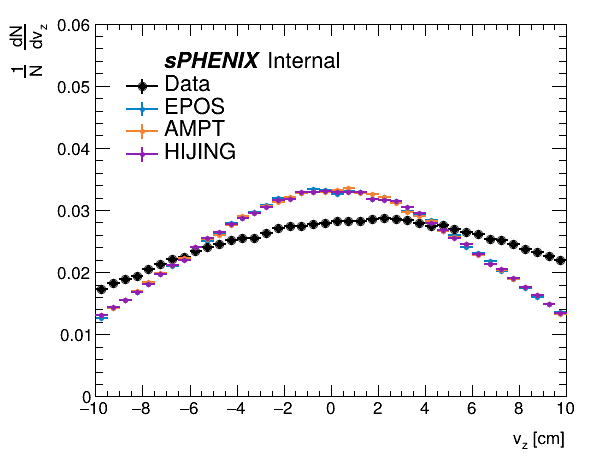

In [44]:
GENS = ['EPOS',"AMPT","HIJING"]
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.2,.65,.5,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.SetBorderSize(0)
for i in range(len(mc_vz)):
    mc_vz[i].GetXaxis().SetRangeUser(-10,10)
    mc_vz[i].SetStats(0)
    mc_vz[i].SetLineColor(colors[i+3])
    mc_vz[i].SetMarkerColor(colors[i+3])
    mc_vz[i].SetMarkerStyle(20)
    mc_vz[i].SetMarkerSize(0.7)
    if i == 0:
        leg.AddEntry(data_vz[i],"Data","lep")
        leg.AddEntry(mc_vz[i],f"{GENS[i]}","lep")
        mc_vz[i].GetYaxis().SetTitleSize(0.04)
        mc_vz[i].GetXaxis().SetTitleSize(0.04)
        mc_vz[i].GetYaxis().SetLabelSize(0.04)
        mc_vz[i].GetXaxis().SetLabelSize(0.04)
        mc_vz[i].GetYaxis().SetTitleOffset(1.8)
        mc_vz[i].SetXTitle("v_{z} [cm]")
        mc_vz[i].SetYTitle("#frac{1}{N} #frac{dN}{dv_{z}}")
        data_vz[i].SetLineColor(1)
        data_vz[i].SetMarkerColor(1)
        data_vz[i].SetMarkerStyle(20)
        mc_vz[i].GetXaxis().SetRangeUser(-10,10)
        mc_vz[i].GetYaxis().SetRangeUser(0,0.06)
        mc_vz[i].Draw()
        data_vz[i].Draw('same')
    else:
        leg.AddEntry(mc_vz[i],f"{GENS[i]}","lep")
        mc_vz[i].Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/spring_2025/detdeta_run24_plots/vz_all_runs_run24.png")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /sphenix/u/egm2153/spring_2025/detdeta_run24_plots/vz_all_runs_run24_-30_30cm.png has been created


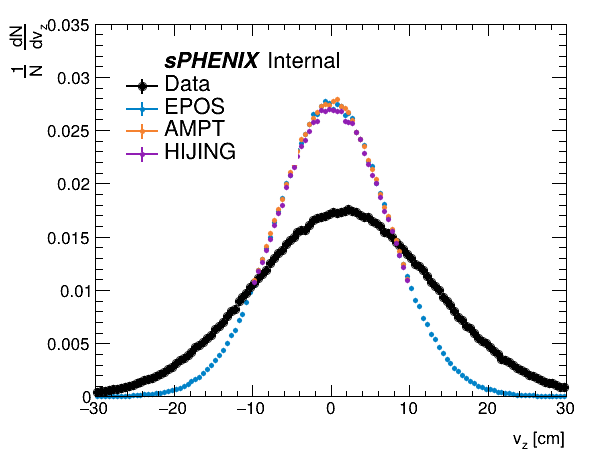

In [45]:
GENS = ['EPOS',"AMPT","HIJING"]
canvas = TCanvas("canvas","",600,500)
leg = ROOT.TLegend(.2,.65,.5,.89)
leg.AddEntry("","#it{#bf{sPHENIX}} Internal","")
leg.SetBorderSize(0)
for i in range(len(mc_vz_full)):
    mc_vz_full[i].GetXaxis().SetRangeUser(-10,10)
    mc_vz_full[i].SetStats(0)
    mc_vz_full[i].SetLineColor(colors[i+3])
    mc_vz_full[i].SetMarkerColor(colors[i+3])
    mc_vz_full[i].SetMarkerStyle(20)
    mc_vz_full[i].SetMarkerSize(0.7)
    if i == 0:
        leg.AddEntry(data_vz_full[i],"Data","lep")
        leg.AddEntry(mc_vz_full[i],f"{GENS[i]}","lep")
        mc_vz_full[i].GetYaxis().SetTitleSize(0.04)
        mc_vz_full[i].GetXaxis().SetTitleSize(0.04)
        mc_vz_full[i].GetYaxis().SetLabelSize(0.04)
        mc_vz_full[i].GetXaxis().SetLabelSize(0.04)
        mc_vz_full[i].GetYaxis().SetTitleOffset(1.8)
        mc_vz_full[i].SetXTitle("v_{z} [cm]")
        mc_vz_full[i].SetYTitle("#frac{1}{N} #frac{dN}{dv_{z}}")
        data_vz_full[i].SetLineColor(1)
        data_vz_full[i].SetMarkerColor(1)
        data_vz_full[i].SetMarkerStyle(20)
        mc_vz_full[i].GetXaxis().SetRangeUser(-30,30)
        mc_vz_full[i].GetYaxis().SetRangeUser(0,0.035)
        mc_vz_full[i].Draw()
        data_vz_full[i].Draw('same')
    else:
        leg.AddEntry(mc_vz_full[i],f"{GENS[i]}","lep")
        mc_vz_full[i].Draw('same')
leg.Draw()
canvas.Draw()
canvas.SaveAs("/sphenix/u/egm2153/spring_2025/detdeta_run24_plots/vz_all_runs_run24_-30_30cm.png")